# Name: Diksha Maharjan
#Student ID: 2408235

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

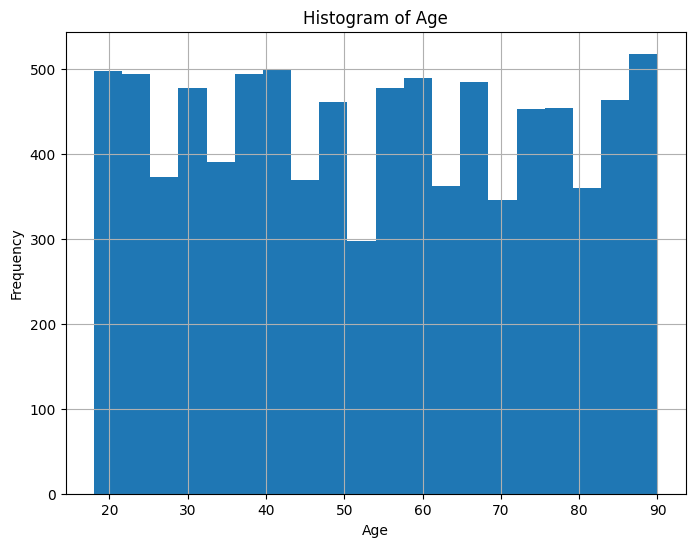

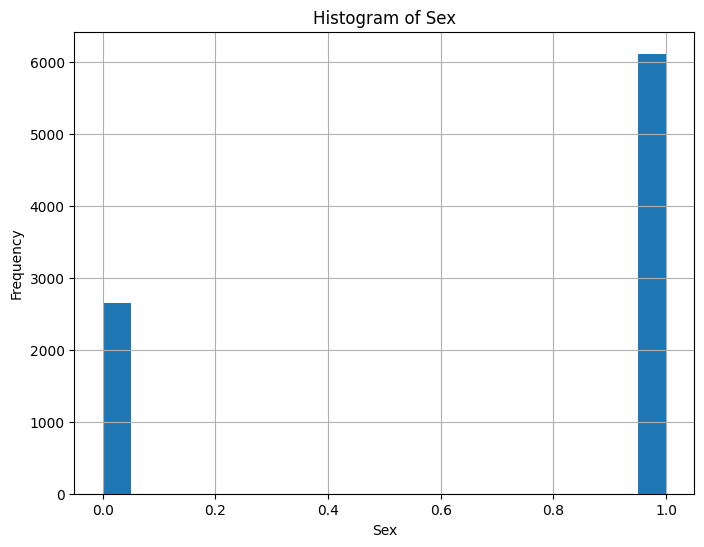

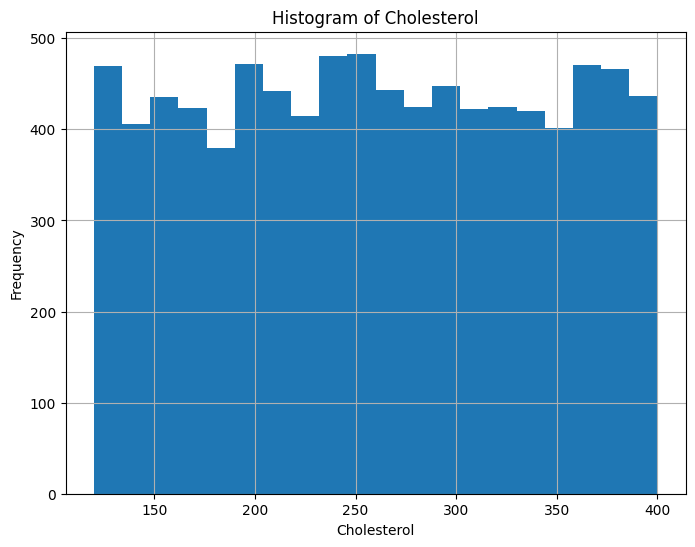

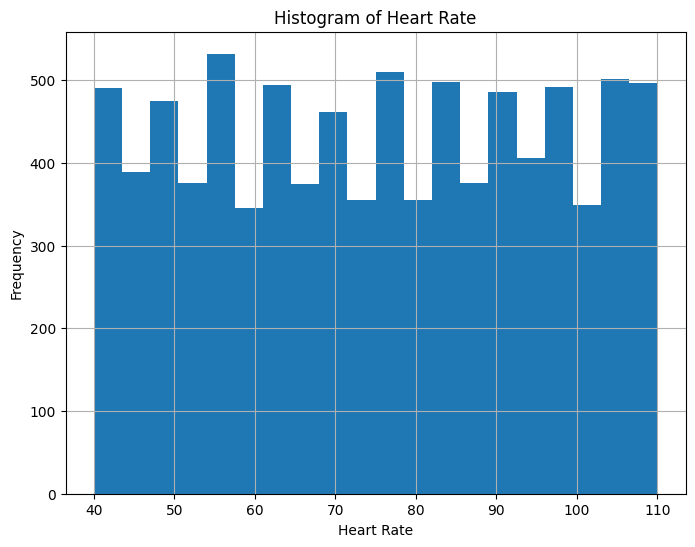

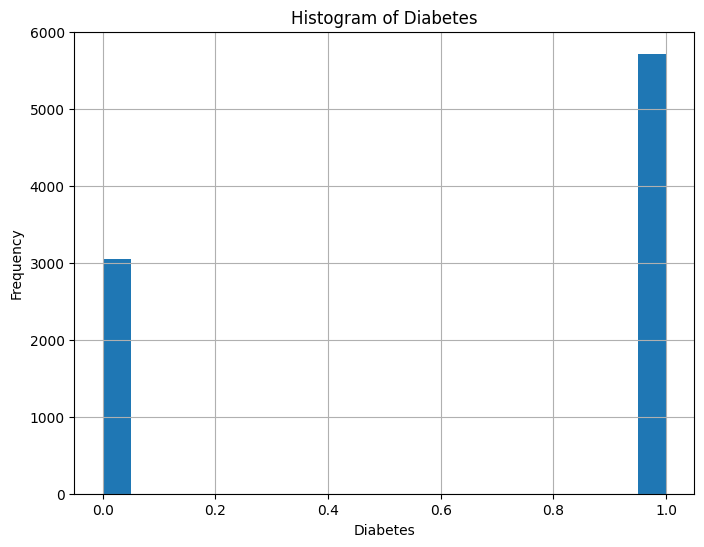

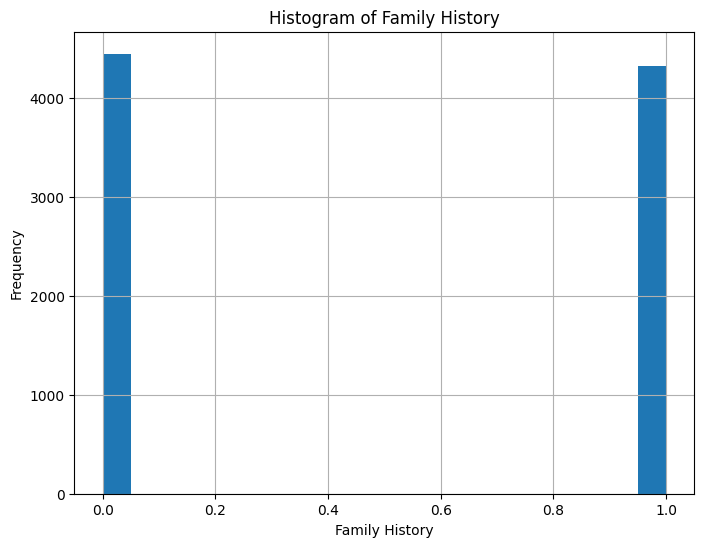

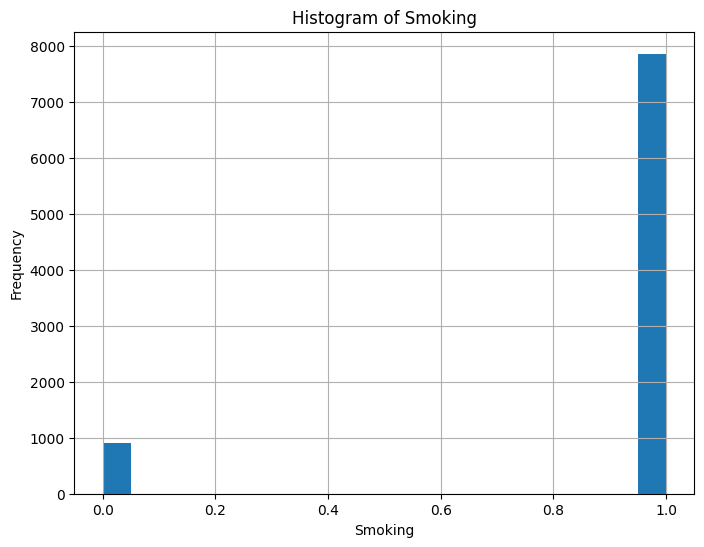

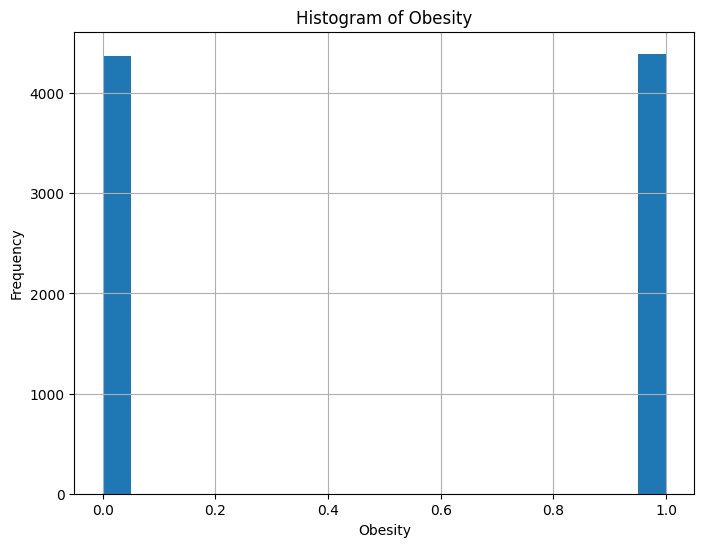

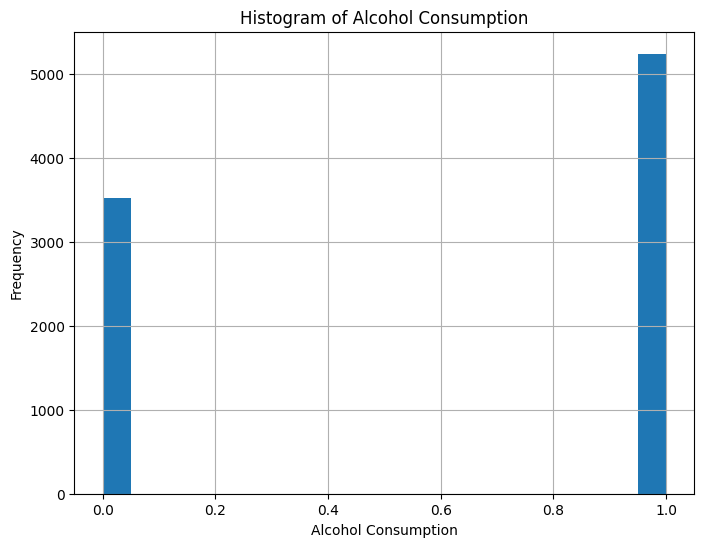

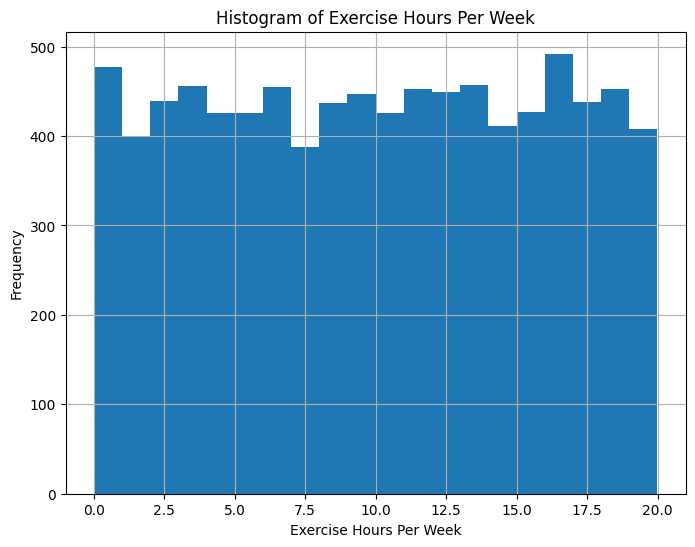

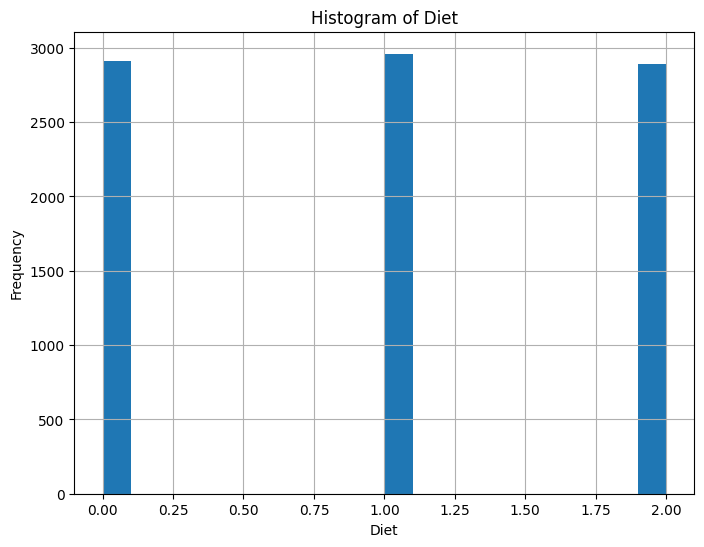

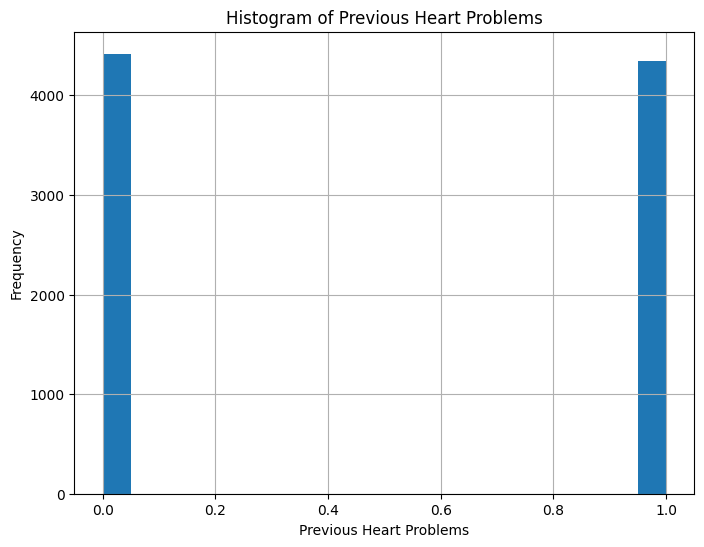

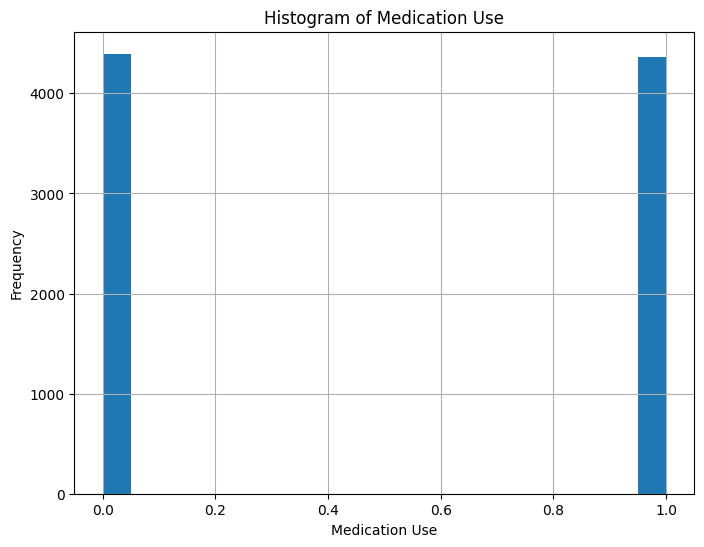

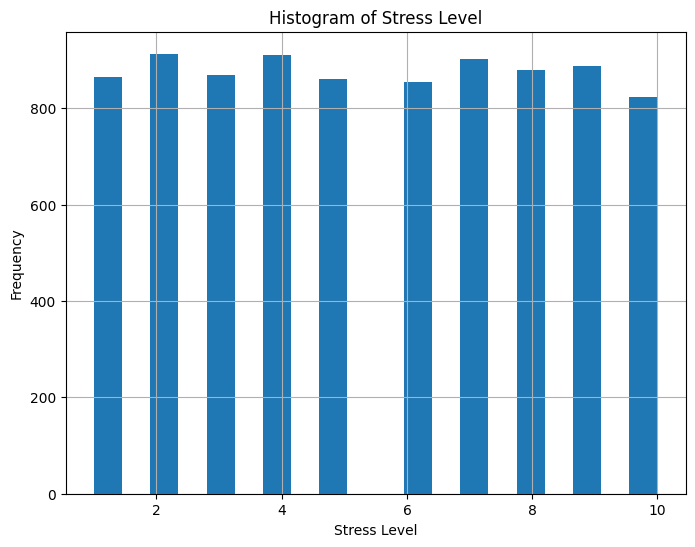

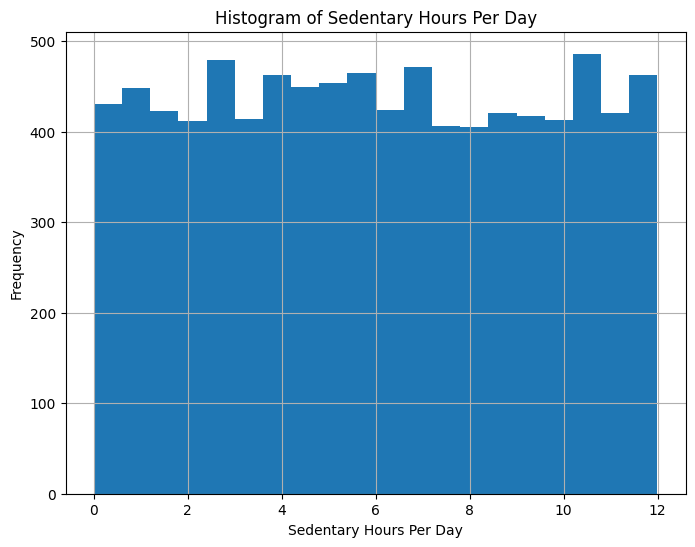

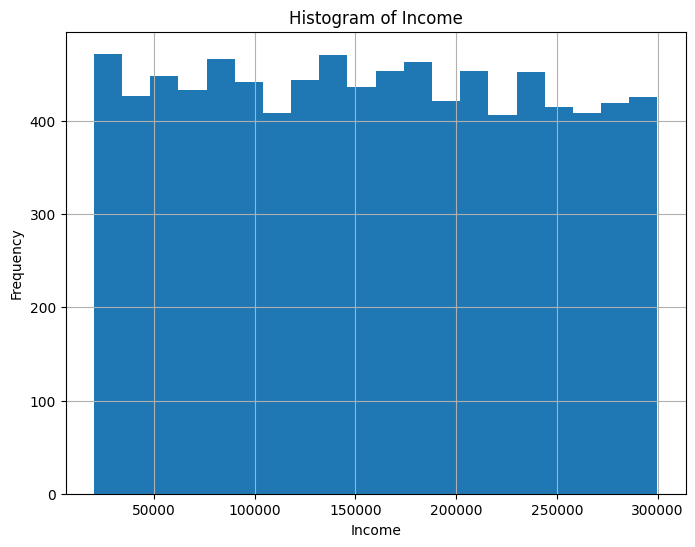

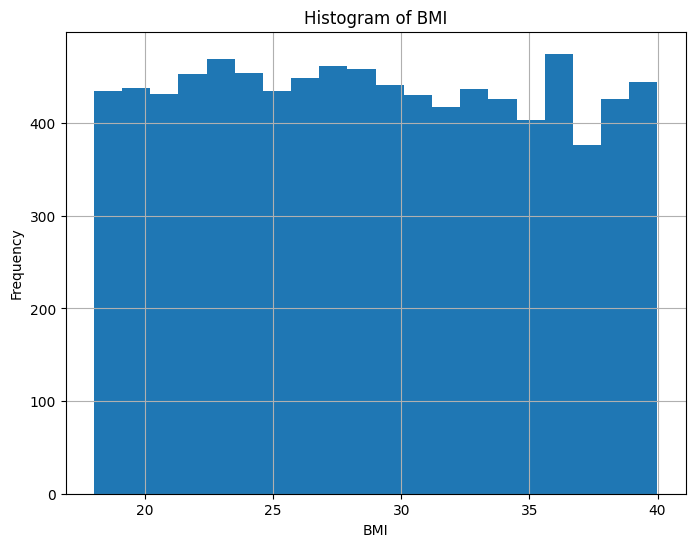

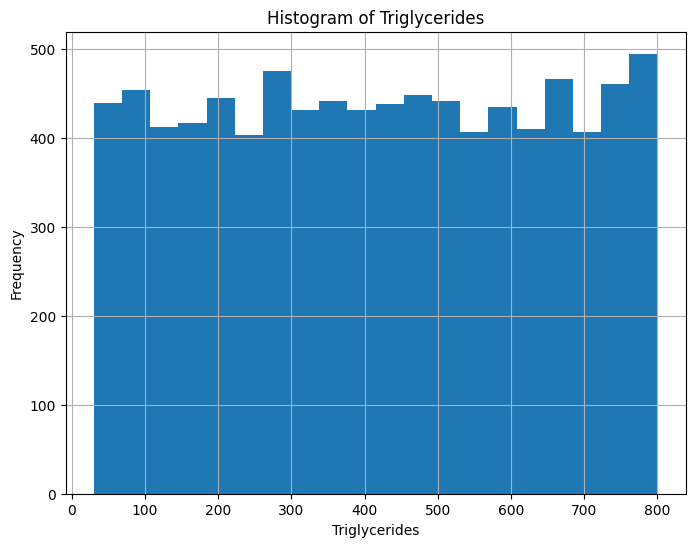

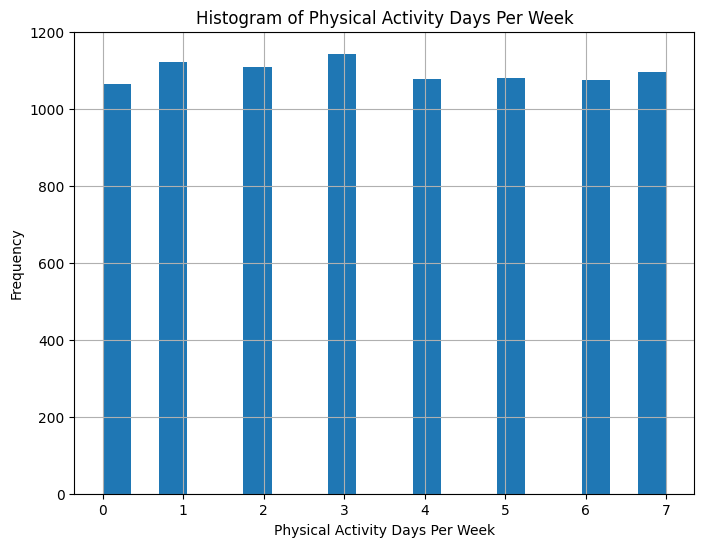

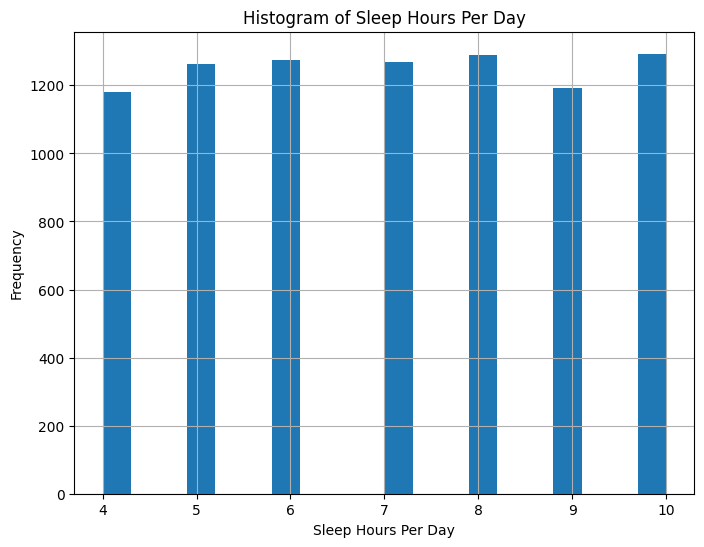

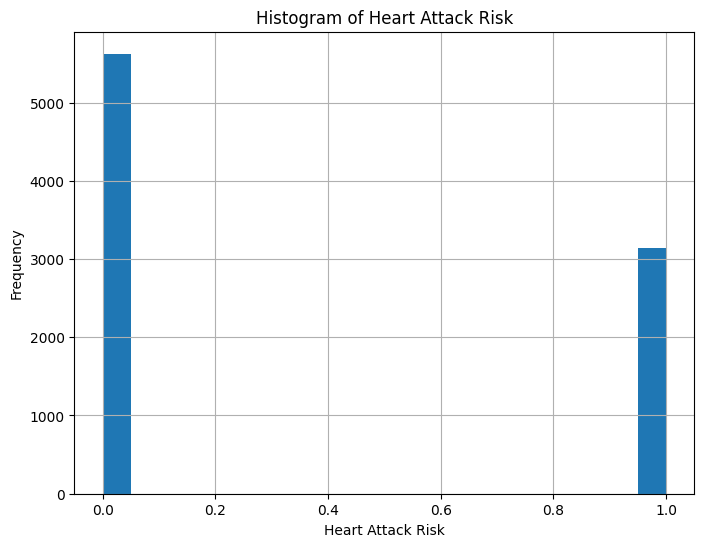

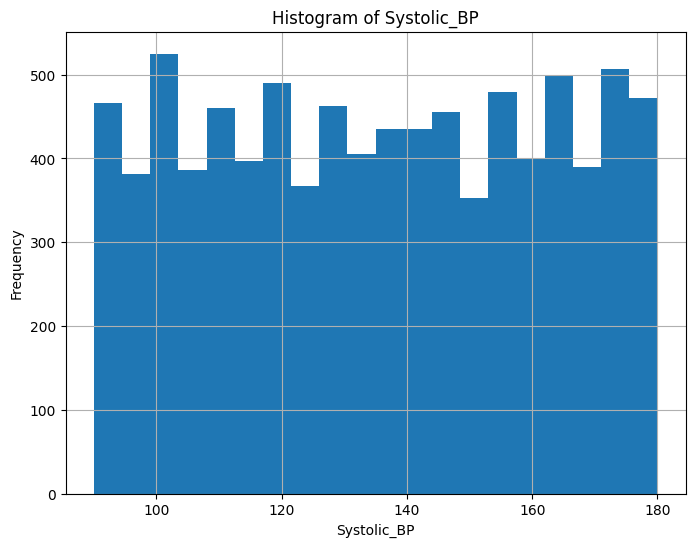

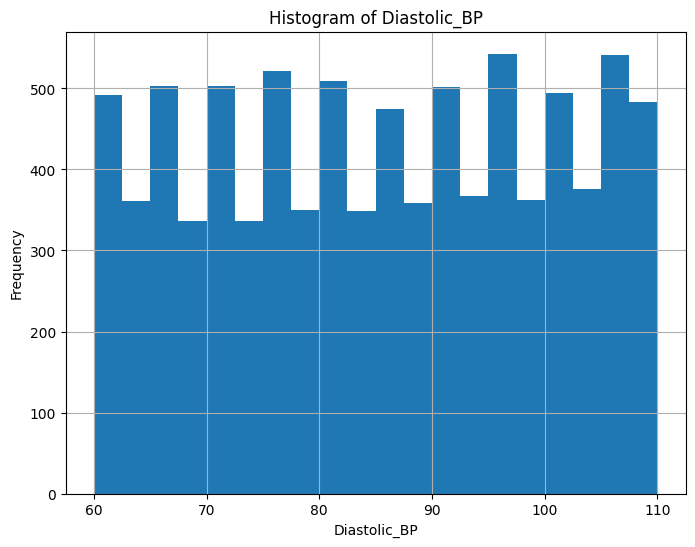

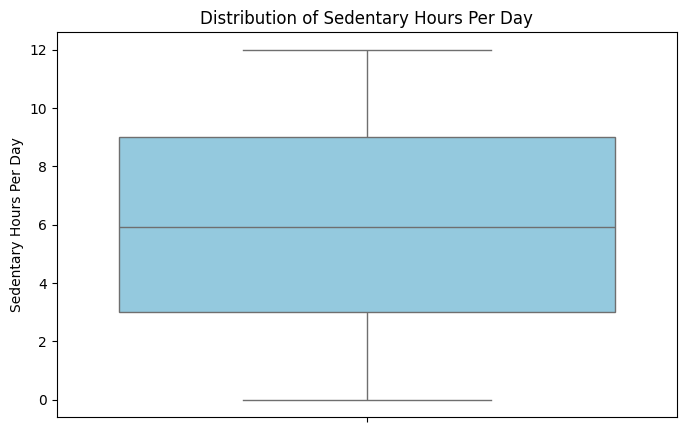

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/aicoursework/heart_attack_prediction_dataset (1).csv")

# Display basic information about the dataset
df.info()
print(df.describe())

# Drop unnecessary columns
df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"])

# Convert categorical features
df["Sex"] = df["Sex"].map({"Male": 1, "Female": 0})
df["Diet"] = df["Diet"].astype("category").cat.codes

# Process Blood Pressure
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df = df.drop(columns=["Blood Pressure"])


import matplotlib.pyplot as plt

# Loop through all columns in the DataFrame
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column
    df[column].hist(bins=20)  # You can adjust the number of bins
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Creating the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Sedentary Hours Per Day'], color='skyblue')

# Labels and title
plt.ylabel('Sedentary Hours Per Day')
plt.title('Distribution of Sedentary Hours Per Day')

# Show plot
plt.show()
#plt.figure(figsize=(12,8))
#sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
#plt.title("Feature Correlation Heatmap")
#plt.show()


# Split Data
X=df.drop(columns=["Sedentary Hours Per Day"])
y=df["Sedentary Hours Per Day"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt
import seaborn as sns



# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")

Data preprocessing completed.


#from scratch

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train and evaluate Linear Regression from Scratch
# Train Linear Regression from Scratch
lin_reg_scratch = LinearRegressionScratch(lr=0.01, epochs=1000)
lin_reg_scratch.fit(X_train_scaled, y_train)
y_pred_scratch = lin_reg_scratch.predict(X_test_scaled)

# Evaluate Scratch Model
print("\n=== Linear Regression (Scratch) ===")
print("MSE:", mean_squared_error(y_test, y_pred_scratch))
print("MAE:", mean_absolute_error(y_test, y_pred_scratch))
print("R² Score:", r2_score(y_test, y_pred_scratch))




=== Linear Regression (Scratch) ===
MSE: 12.179387594459586
MAE: 3.0041802862242597
R² Score: -0.000124838408564365


model:1

In [ ]:
# Model 1: Scikit-Learn Linear Regression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_test_sklearn = lr_sklearn.predict(X_test)
print("Linear Regression (Sklearn) - MSE:", mean_squared_error(y_test, y_pred_test_sklearn))
print("Linear Regression (Sklearn) - R2 Score:", r2_score(y_test, y_pred_test_sklearn))



Linear Regression (Sklearn) - MSE: 12.179433637037437
Linear Regression (Sklearn) - R2 Score: -0.00012861924938056823


model:2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Model 2: Random Forest Regression
ran_reg=RandomForestRegressor(random_state=42)
ran_reg.fit(X_train, y_train)
y_pred_test_ran=ran_reg.predict(X_test)
print("Random Forest Regression - MSE:", mean_squared_error(y_test, y_pred_test_ran))
print("Random Forest Regression - R2 Score:", r2_score(y_test, y_pred_test_ran))

Random Forest Regression - MSE: 12.388641582880878
Random Forest Regression - R2 Score: -0.017307977522339923


both of the model's r2 score is bad but random regressor has worse compared to linear regression, while, random regressor can be optimized well. we can do it through hyper parameter tuning

#hyper parameter tuning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Define the parameter grid (no 'solver' parameter for LinearRegression)
param_grid = {
    'linearregression__fit_intercept': [True, False]  # Only tuning 'fit_intercept'
}

# Initialize Linear Regression model
lr_sklearn = LinearRegression()

# Create a pipeline that first scales the data and then applies linear regression
pipeline = make_pipeline(StandardScaler(), lr_sklearn)

# Grid Search with 5-fold cross-validation
grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best model from GridSearch
best_lr = grid_search_lr.best_estimator_

# Predictions using the best model
y_pred_test_best_lr = best_lr.predict(X_test)

# Evaluate the best model
print("Best Parameters:", grid_search_lr.best_params_)
print("Linear Regression (Sklearn) - MSE:", mean_squared_error(y_test, y_pred_test_best_lr))
print("Linear Regression (Sklearn) - R² Score:", r2_score(y_test, y_pred_test_best_lr))


Best Parameters: {'linearregression__fit_intercept': True}
Linear Regression (Sklearn) - MSE: 12.179433637037414
Linear Regression (Sklearn) - R² Score: -0.00012861924937879188


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



param_grid_rf = {
    "n_estimators": [500],  # Reduce the number of trees to a smaller value
    "max_depth": [1,5],    # Limit depth options
    #"min_samples_split": [2, 5],
    #"min_samples_leaf": [1, 2],
    #"bootstrap": [True]      # Keep only one bootstrap option
}

# GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best estimator (model)
best_rf = grid_search_rf.best_estimator_

# Predict on the test set
y_pred_test_best_rf = best_rf.predict(X_test)

# Evaluate performance
print("Tuned Random Forest - MSE:", mean_squared_error(y_test, y_pred_test_best_rf))
print("Tuned Random Forest - R2 Score:", r2_score(y_test, y_pred_test_best_rf))
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Tuned Random Forest - MSE: 12.174635710395068
Tuned Random Forest - R2 Score: 0.000265368179846015

Best Hyperparameters for Random Forest: {'max_depth': 1, 'n_estimators': 500}


R2 score for random forest is better than linear regression after tuning so choosing it for the best model

#best feature selection

In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(lr_sklearn, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Sex', 'Diabetes', 'Family History', 'Obesity', 'Alcohol Consumption',
       'Diet', 'Previous Heart Problems', 'Medication Use',
       'Sedentary Hours Per Day', 'Heart Attack Risk'],
      dtype='object')


#final optimized model

In [ ]:
best_model = RandomForestRegressor(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                   max_depth=grid_search_rf.best_params_['max_depth'])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("\n=== Final Optimized Model ===")
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))


=== Final Optimized Model ===
MSE: 12.173354014648197
MAE: 3.00368917851644
R² Score: 0.0003706161442273981
